### Student Information
Name: 呂彥寬

Student ID: 110060602

GitHub ID: nelson0515337

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

# part 1 take home excercises

In [1]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [2]:
#take home 1
#search for key word contain key word about data science
import re
res = []
for txt in X['text']:
     res.append(re.search('(ml|machine learning|deep learning|big data)', txt, re.IGNORECASE) != None)
X.loc[res]

text  category  \
97    From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   
107   From: samson@prlhp1.prl.philips.co.uk (Mark Sa...         1   
110   From: news@cbnewsk.att.com Subject: Re: An agn...         3   
122   From: lpzsml@unicorn.nott.ac.uk (Steve Lang) S...         0   
179   From: boebert@sctc.com (Earl Boebert) Subject:...         1   
...                                                 ...       ...   
2110  From: carl@SOL1.GPS.CALTECH.EDU (Carl J Lydick...         2   
2173  From: reedr@cgsvax.claremont.edu Subject: Re: ...         3   
2190  From: REXLEX@fnal.fnal.gov Subject: Re: Athies...         3   
2234  From: David.Rice@ofa123.fidonet.org Subject: i...         0   
2238  From: jim.zisfein@factory.com (Jim Zisfein)  S...         2   

               category_name  
97                   sci.med  
107            comp.graphics  
110   soc.religion.christian  
122              alt.atheism  
179            comp.graphics  
...                      ...  
2110                 sci.med  
2173  soc.religion.christian  
2190  soc.religion.christian  
2234             alt.atheism  
2238                 sci.med  

[70 rows x 3 columns]

In [3]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [4]:
#takehome 3
X_sample = X.sample(n=1000) #random state
# Answer here
indices = X_sample.index
different_row = 0;
for i in range(len(indices)) :
    check1 = X.iloc[indices[i]].text != X_sample.iloc[i].text
    check2 = X.iloc[indices[i]].category != X_sample.iloc[i].category
    check3 = X.iloc[indices[i]].category_name != X_sample.iloc[i].category_name
    if check1 or check2 or check3:
            different_row +=1
print(different_row)

0


the code above check every coresponding tuple in X and X_sample, and I use different_row to record difference instence
since the final output of different_row is 0 which indicates the sampling process do not change the original X dataframe.

In [5]:
#takehome 4
# Answer here

sample = X_sample.category_name.value_counts()
total = X.category_name.value_counts()
category = ['comp.graphics', 'soc.religion.christian', 'sci.med', 'alt.atheism']

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x = category,
    y = total,
    name = 'Toatl',
    marker_color = 'darkcyan'
))

fig.add_trace(go.Bar(
    x = category,
    y = sample,
    name = 'Sample',
    marker_color='chocolate'
))


fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [6]:
import nltk
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)


In [7]:
#takehome 5

#convert from sparse array to normal array
vectors = X_counts[0:5, 0:100].toarray()
# retrieve first 100 feature names
first100_names = count_vect.get_feature_names()[0:100]
#loop for nonzero element in X_count[4], and return the feature name for the index
for i in range(100):
    if  vectors[4][i]:
        print(first100_names[i])

#utlize inverse_transform function
count_vect.inverse_transform(vectors)

00
01


[array([], dtype='<U80'),
 array([], dtype='<U80'),
 array([], dtype='<U80'),
 array([], dtype='<U80'),
 array(['00', '01'], dtype='<U80')]

### takehome 6

I tried to find a  denser region using "concept of integral image for fast caculation" and polt it out

it still takes some tome to compute : (

In [8]:
# Answer here
# 

n = X_counts.shape[0]
m = 5000 
boolean_x = np.zeros((n, m), dtype=int)
for i in range(n):
    for j in range(m):
        boolean_x[i,j] = 1 if X_counts[i,j] else 0

integral = np.zeros((n, m), dtype=int)
#compute summed-area table
for i in range(1, n): integral[i,0] = integral[i-1,0]+boolean_x[i,0]
for j in range(1, m): integral[0,j] = integral[0,j-1]+boolean_x[0,j]
for i in range(1, n): 
    for j in range(1, m):
        integral[i,j] = boolean_x[i,j] + integral[i-1,j] + integral[i,j-1] - integral[i-1,j-1]


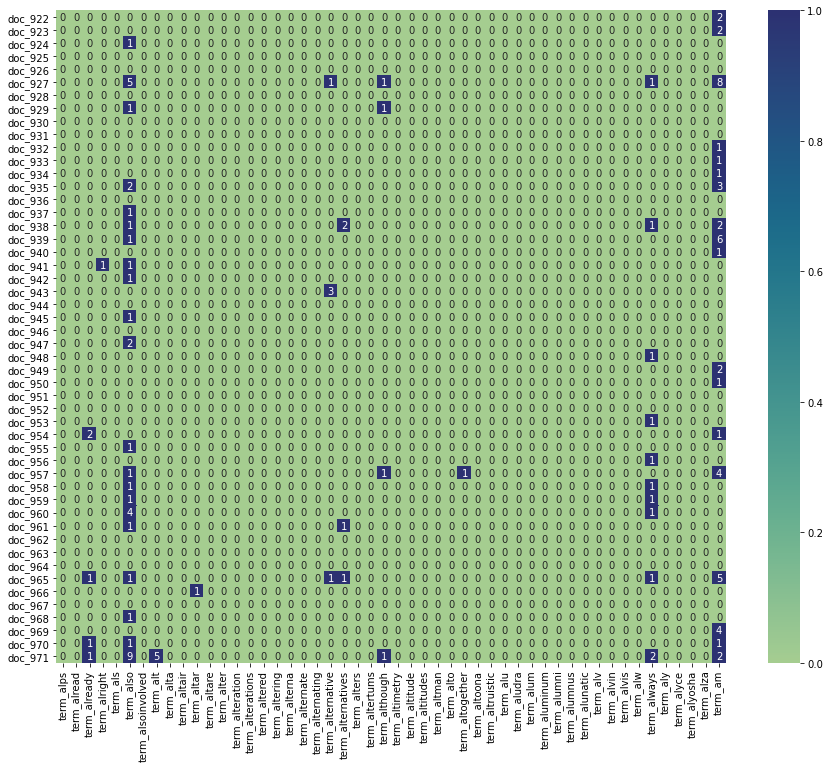

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

maxi = 0
top_r = 0 
top_c = 0
offset = 50
for r in range(n-offset):
    for c in range(m-offset):
        total_count = integral[r+offset-1,c+offset-1] - integral[r,c+offset-1] - integral[r+offset-1,c] + integral[r,c]
        if total_count > maxi:
            maxi = total_count
            top_r = r
            top_c = c 
#print(maxi)
#print(top_r, top_c)

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[top_c : top_c+offset]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[top_r : top_r+offset]]
plot_z = X_counts[top_r : top_r+offset, top_c : top_c+offset].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_todraw,
                 cmap="crest",
                 vmin=0, vmax=1, annot=True)

In [10]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

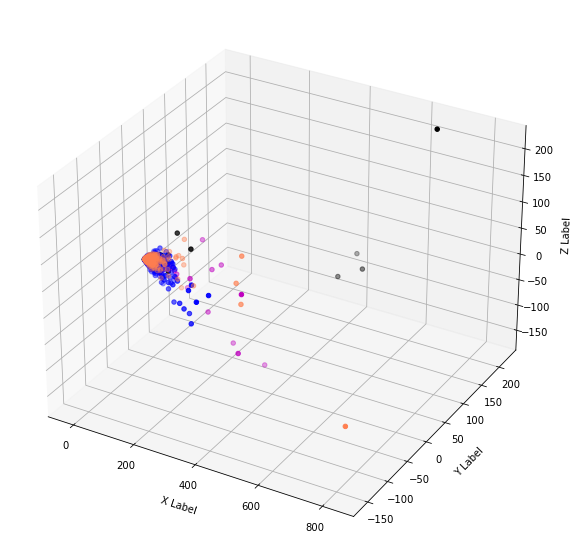

In [11]:
#takehome 7
# Answer here
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

In [12]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [13]:
#takehome 8
# Answer here
data = []
terms = count_vect.get_feature_names()
for i in range(100):
    cnt = {'alt.atheism':0, 'soc.religion.christian':0, 'comp.graphics':0, 'sci.med':0}
    for j in range(X.shape[0]):
            cnt[X.iloc[j].category_name] += X_counts[j,i]
    data.append((terms[i], cnt['alt.atheism'], cnt['soc.religion.christian'], cnt['comp.graphics'], cnt['sci.med']))
    
df = pd.DataFrame(data, columns=['term','alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med'])

import plotly.express as px


fig = px.bar(df, x="term", y=categories, title="term frequency in four categories")
fig.show()

In [14]:
#takehome 9
# Answer here
df['other'] = df['alt.atheism'] + df['soc.religion.christian'] + df['sci.med']
df_comp = df[['term', 'comp.graphics', 'other']]
fig = px.bar(df_comp, x="term", y=['comp.graphics', 'other'], title="focus on computer graphics")
fig.show()

In [15]:
#takehome 10

# Answer here
#for better visualization I only pick up top 1000 frequent terms for ploting
# acording to Wiki approximately 80% of distribution is head

df = pd.DataFrame()
df['term'] = terms
df['count'] = term_frequencies
df = df.sort_values('count', ascending=False)[:1000]
threshold = sum(df['count'])*0.8
cnt = 0
split_idx = -1

for i in range(df.shape[0]):
    cnt += df.iloc[i]['count']
    if cnt > threshold:
        split_idx = i
        break

df_head = df.iloc[:split_idx, :]
df_tail = df.iloc[split_idx:, :]


import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=df_head['term'], y=df_head['count'], name='head',
                marker_color='lime'))
fig.add_trace(go.Bar(x=df_tail['term'], y=df_tail['count'], name='tail',
                marker_color='yellow'))
fig.show()


In [16]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)


LabelBinarizer()

In [17]:
#takehome 11
# it works
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

  bin_category_name  
0      [0, 1, 0, 0]  
1      [0, 1, 0, 0]  
2      [0, 0, 0, 1]  
3      [0, 0, 0, 1]  
4      [0, 0, 0, 1]  
5      [0, 0, 0, 1]  
6      [0, 0, 0, 1]  
7      [0, 0, 1, 0]  
8      [0, 0, 1, 0]

# part2 experiment  on new dataset
### I find a data set I am interest in. It's about movie comments, and it contains comments labelled with positive or negative sentiment which is very similar to the new dataset provide by TA

In [25]:
categories = ['negative', 'positive']
from helpers import data_mining_helpers as dmh
import pandas as pd
X = pd.read_csv('commentData.csv')

In [26]:
X.shape

(2000, 2)

In [27]:
X[0:2]

comment  type
0  plot : two teen couples go to a church party ,...     0
1  the happy bastard's quick movie review \ndamn ...     0

In [28]:
print("\n".join(X.iloc[0].comment.split("\n")))

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no id

In [29]:
for t in X['comment'][:3]:
    print(t)

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no id

In [30]:
#add category to dataframe
def get_type(n):
    return categories[1] if n else categories[0]
X['category'] = X.type.apply(get_type)

In [32]:
# here I tried to find comments with key word horror
import re
res = []
for txt in X['comment']:
     res.append(re.search('horro', txt, re.IGNORECASE) != None)
X.loc[res].category.value_counts()

positive    130
negative    119
Name: category, dtype: int64

### checking for missing value and duplicates

In [33]:
X.isnull()

comment   type  category
0       False  False     False
1       False  False     False
2       False  False     False
3       False  False     False
4       False  False     False
...       ...    ...       ...
1995    False  False     False
1996    False  False     False
1997    False  False     False
1998    False  False     False
1999    False  False     False

[2000 rows x 3 columns]

In [35]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

comment                                type  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             category  
0  The amoung of missing records is:   
1                                   0

In [36]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [37]:
sum(X.duplicated())

0

### Data sampling

In [38]:
X_sample = X.sample(n=1000) #random state

In [39]:
X_sample[0:10]

comment  type  category
369   renowned hong kong action director tsui hark f...     0  negative
1714  star wars : episode i - the phantom menace rev...     1  positive
985   boy , what a great movie ! ! \nkeanu reeves an...     0  negative
225   plot : a rich guy who doesn't believe in love ...     0  negative
1393  plot : odin is a great high school basketball ...     1  positive
1530  james jones , one of the major novelists from ...     1  positive
676   bad . bad . \nbad . \nthat one word seems to p...     0  negative
1476  one of the most popular subplots in the entire...     1  positive
185    " the animal " is a marginally inspired comed...     0  negative
1277  `oh behave ! \nfelicity shagwell is one shagad...     1  positive

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:title={'center':'Category distribution'}>

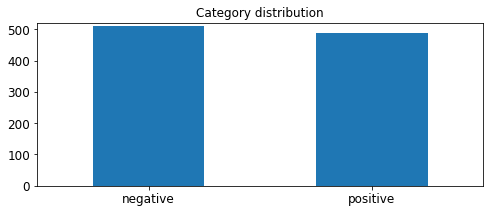

In [41]:
# Answer here
upper_bound = max(X_sample.category.value_counts()) + 10



# plot barchart for X_sample
X_sample.category.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

In [42]:

sample = X_sample.category.value_counts()
total = X.category.value_counts()

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x = categories,
    y = total,
    name = 'Toatl',
    marker_color = 'darkcyan'
))

fig.add_trace(go.Bar(
    x = categories,
    y = sample,
    name = 'Sample',
    marker_color='chocolate'
))


fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

### Feature Creation

In [44]:
import nltk
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

In [45]:
X[0:5]['unigrams']

0    [plot, :, two, teen, couples, go, to, a, churc...
1    [the, happy, bastard, 's, quick, movie, review...
2    [it, is, movies, like, these, that, make, a, j...
3    [``, quest, for, camelot, ``, is, warner, bros...
4    [synopsis, :, a, mentally, unstable, man, unde...
Name: unigrams, dtype: object

In [46]:
X[0:5]

comment  type  category  \
0  plot : two teen couples go to a church party ,...     0  negative   
1  the happy bastard's quick movie review \ndamn ...     0  negative   
2  it is movies like these that make a jaded movi...     0  negative   
3   " quest for camelot " is warner bros . ' firs...     0  negative   
4  synopsis : a mentally unstable man undergoing ...     0  negative   

                                            unigrams  
0  [plot, :, two, teen, couples, go, to, a, churc...  
1  [the, happy, bastard, 's, quick, movie, review...  
2  [it, is, movies, like, these, that, make, a, j...  
3  [``, quest, for, camelot, ``, is, warner, bros...  
4  [synopsis, :, a, mentally, unstable, man, unde...

In [47]:
list(X[0:1]['unigrams'])

[['plot',
  ':',
  'two',
  'teen',
  'couples',
  'go',
  'to',
  'a',
  'church',
  'party',
  ',',
  'drink',
  'and',
  'then',
  'drive',
  '.',
  'they',
  'get',
  'into',
  'an',
  'accident',
  '.',
  'one',
  'of',
  'the',
  'guys',
  'dies',
  ',',
  'but',
  'his',
  'girlfriend',
  'continues',
  'to',
  'see',
  'him',
  'in',
  'her',
  'life',
  ',',
  'and',
  'has',
  'nightmares',
  '.',
  'what',
  "'s",
  'the',
  'deal',
  '?',
  'watch',
  'the',
  'movie',
  'and',
  '``',
  'sorta',
  '``',
  'find',
  'out',
  '.',
  '.',
  '.',
  'critique',
  ':',
  'a',
  'mind-fuck',
  'movie',
  'for',
  'the',
  'teen',
  'generation',
  'that',
  'touches',
  'on',
  'a',
  'very',
  'cool',
  'idea',
  ',',
  'but',
  'presents',
  'it',
  'in',
  'a',
  'very',
  'bad',
  'package',
  '.',
  'which',
  'is',
  'what',
  'makes',
  'this',
  'review',
  'an',
  'even',
  'harder',
  'one',
  'to',
  'write',
  ',',
  'since',
  'i',
  'generally',
  'applaud',
  'film

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment)
print(X_counts)

  (0, 26455)	1
  (0, 36577)	2
  (0, 35033)	4
  (0, 8017)	1
  (0, 14902)	2
  (0, 35714)	16
  (0, 6402)	1
  (0, 25442)	1
  (0, 10737)	1
  (0, 1810)	20
  (0, 35305)	3
  (0, 10748)	1
  (0, 35351)	5
  (0, 14630)	3
  (0, 18386)	5
  (0, 1760)	3
  (0, 844)	1
  (0, 24508)	3
  (0, 24386)	16
  (0, 35280)	38
  (0, 15609)	1
  (0, 9724)	1
  (0, 5187)	10
  (0, 16534)	1
  (0, 14740)	1
  :	:
  (1999, 38653)	1
  (1999, 2308)	1
  (1999, 23552)	1
  (1999, 25856)	1
  (1999, 5080)	4
  (1999, 16585)	2
  (1999, 14430)	2
  (1999, 23783)	4
  (1999, 4794)	1
  (1999, 36725)	1
  (1999, 7165)	1
  (1999, 24363)	1
  (1999, 20622)	1
  (1999, 32392)	1
  (1999, 24969)	1
  (1999, 25250)	1
  (1999, 37594)	1
  (1999, 32537)	1
  (1999, 24307)	1
  (1999, 24269)	1
  (1999, 34845)	1
  (1999, 35610)	1
  (1999, 26874)	1
  (1999, 19393)	1
  (1999, 5499)	1


In [50]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")

['hello', 'world']

In [51]:
anal_str = " ".join(list(X[:1].comment))
analyze(anal_str)

['plot',
 'two',
 'teen',
 'couples',
 'go',
 'to',
 'church',
 'party',
 'drink',
 'and',
 'then',
 'drive',
 'they',
 'get',
 'into',
 'an',
 'accident',
 'one',
 'of',
 'the',
 'guys',
 'dies',
 'but',
 'his',
 'girlfriend',
 'continues',
 'to',
 'see',
 'him',
 'in',
 'her',
 'life',
 'and',
 'has',
 'nightmares',
 'what',
 'the',
 'deal',
 'watch',
 'the',
 'movie',
 'and',
 'sorta',
 'find',
 'out',
 'critique',
 'mind',
 'fuck',
 'movie',
 'for',
 'the',
 'teen',
 'generation',
 'that',
 'touches',
 'on',
 'very',
 'cool',
 'idea',
 'but',
 'presents',
 'it',
 'in',
 'very',
 'bad',
 'package',
 'which',
 'is',
 'what',
 'makes',
 'this',
 'review',
 'an',
 'even',
 'harder',
 'one',
 'to',
 'write',
 'since',
 'generally',
 'applaud',
 'films',
 'which',
 'attempt',
 'to',
 'break',
 'the',
 'mold',
 'mess',
 'with',
 'your',
 'head',
 'and',
 'such',
 'lost',
 'highway',
 'memento',
 'but',
 'there',
 'are',
 'good',
 'and',
 'bad',
 'ways',
 'of',
 'making',
 'all',
 'types',

In [52]:
X_counts.shape

(2000, 39659)

In [53]:
count_vect.get_feature_names()[0:10]

['00', '000', '0009f', '007', '00s', '03', '04', '05', '05425', '10']

In [55]:
X_counts[0:5, 0:200].toarray()

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,

### plot the fist 20 terms in first 20 documents

In [57]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
plot_x

['term_00',
 'term_000',
 'term_0009f',
 'term_007',
 'term_00s',
 'term_03',
 'term_04',
 'term_05',
 'term_05425',
 'term_10',
 'term_100',
 'term_1000',
 'term_10000',
 'term_100m',
 'term_101',
 'term_102',
 'term_103',
 'term_104',
 'term_105',
 'term_106']

In [58]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [59]:
plot_z = X_counts[0:20, 0:20].toarray()
plot_z.shape

(20, 20)

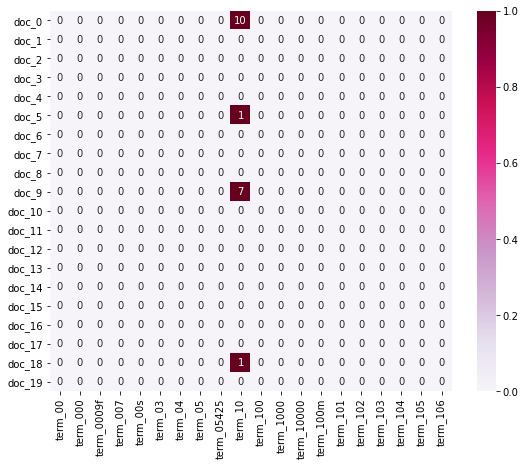

In [60]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [64]:
# find a denser region to plot

n = X_counts.shape[0]
m = 5000 
boolean_x = np.zeros((n, m), dtype=int)
for i in range(n):
    for j in range(m):
        boolean_x[i,j] = 1 if X_counts[i,j] else 0

integral = np.zeros((n, m), dtype=int)
#compute summed-area table
for i in range(1, n): integral[i,0] = integral[i-1,0]+boolean_x[i,0]
for j in range(1, m): integral[0,j] = integral[0,j-1]+boolean_x[0,j]
for i in range(1, n): 
    for j in range(1, m):
        integral[i,j] = boolean_x[i,j] + integral[i-1,j] + integral[i,j-1] - integral[i-1,j-1]


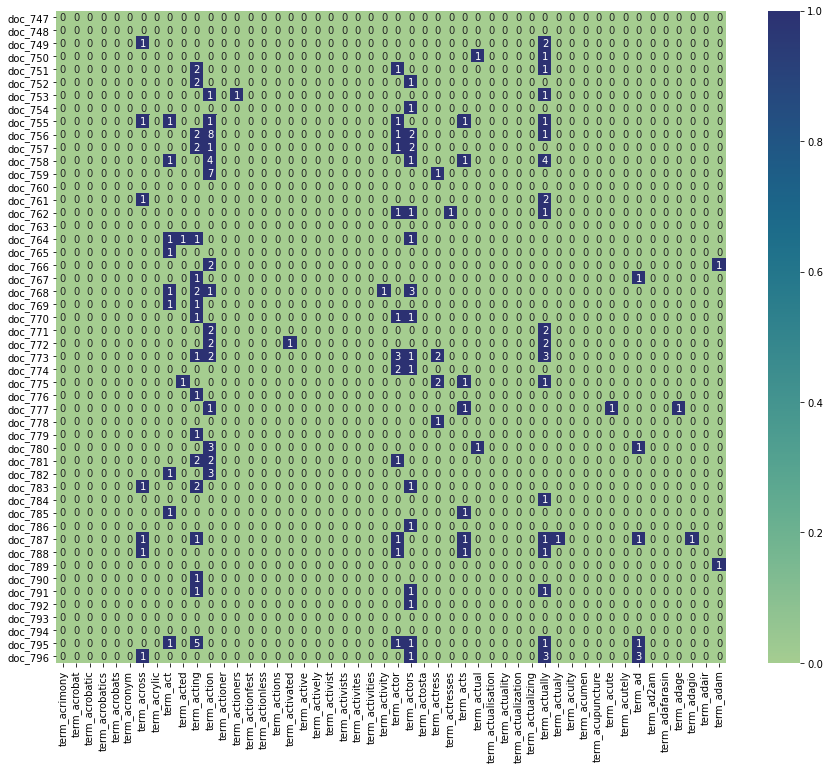

In [63]:
maxi = 0
top_r = 0 
top_c = 0
offset = 50
for r in range(n-offset):
    for c in range(m-offset):
        total_count = integral[r+offset-1,c+offset-1] - integral[r,c+offset-1] - integral[r+offset-1,c] + integral[r,c]
        if total_count > maxi:
            maxi = total_count
            top_r = r
            top_c = c 
#print(maxi)
#print(top_r, top_c)

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[top_c : top_c+offset]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[top_r : top_r+offset]]
plot_z = X_counts[top_r : top_r+offset, top_c : top_c+offset].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 12))
ax = sns.heatmap(df_todraw,
                 cmap="crest",
                 vmin=0, vmax=1, annot=True)

# Dimensionality Reduction

In [65]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
X_reduced.shape

(2000, 2)

In [66]:
categories

['negative', 'positive']

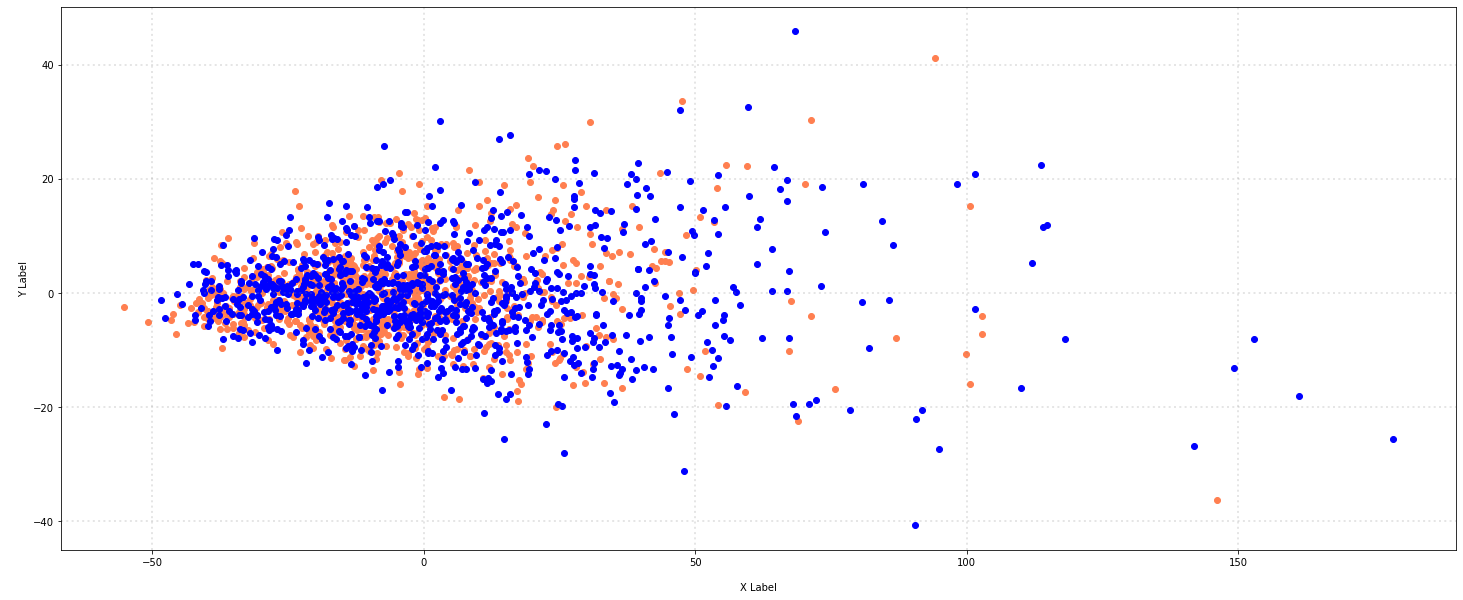

In [68]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category'] == category].T[0]
    ys = X_reduced[X['category'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

# Atrribute Transformation / Aggregation

In [69]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
len(term_frequencies)

39659

In [70]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

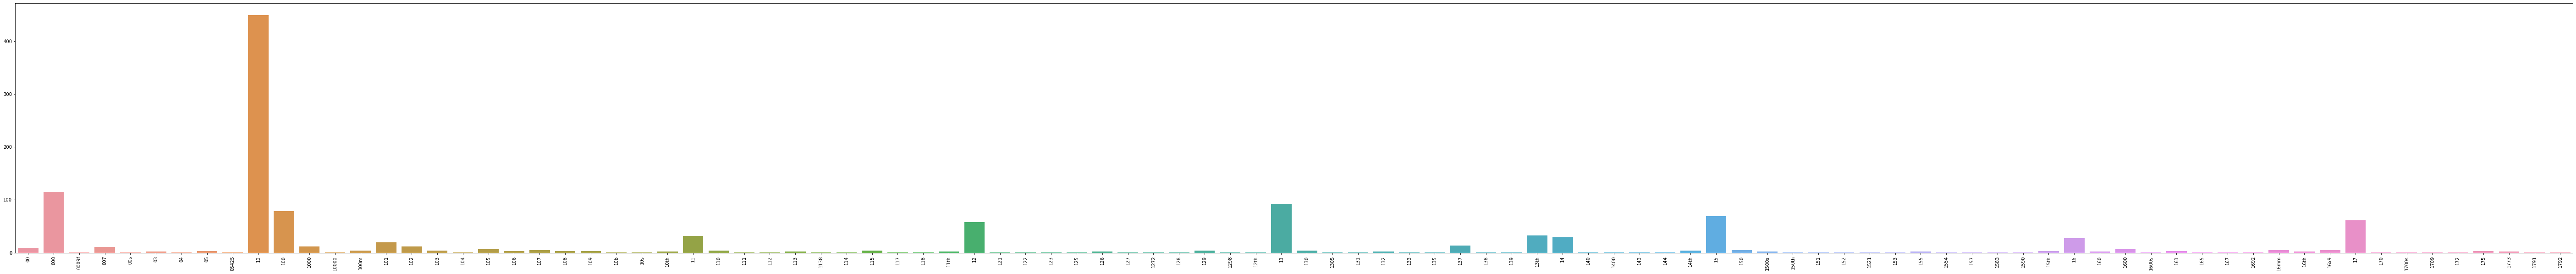

In [71]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:100], 
            y=term_frequencies[:100])
g.set_xticklabels(count_vect.get_feature_names()[:100], rotation = 90);

In [74]:
#find word frequecies in negative and positive comments
data = []
terms = count_vect.get_feature_names()
for i in range(200):
    cnt = {'negative':0, 'positive':0}
    for j in range(X.shape[0]):
            cnt[X.iloc[j].category] += X_counts[j,i]
    data.append((terms[i], cnt['negative'], cnt['positive']))
    
df = pd.DataFrame(data, columns=['term','negative', 'positive'])

import plotly.express as px


fig = px.bar(df, x="term", y=categories, title="term frequency in four categories")
fig.show()

In [77]:
#show the long tail distribution of top 1000 frequent words

df = pd.DataFrame()
df['term'] = terms
df['count'] = term_frequencies
df = df.sort_values('count', ascending=False)[:1000]
threshold = sum(df['count'])*0.8
cnt = 0
split_idx = -1

for i in range(df.shape[0]):
    cnt += df.iloc[i]['count']
    if cnt > threshold:
        split_idx = i
        break

df_head = df.iloc[:split_idx, :]
df_tail = df.iloc[split_idx:, :]


import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=df_head['term'], y=df_head['count'], name='head',
                marker_color='lime'))
fig.add_trace(go.Bar(x=df_tail['term'], y=df_tail['count'], name='tail',
                marker_color='yellow'))
fig.show()

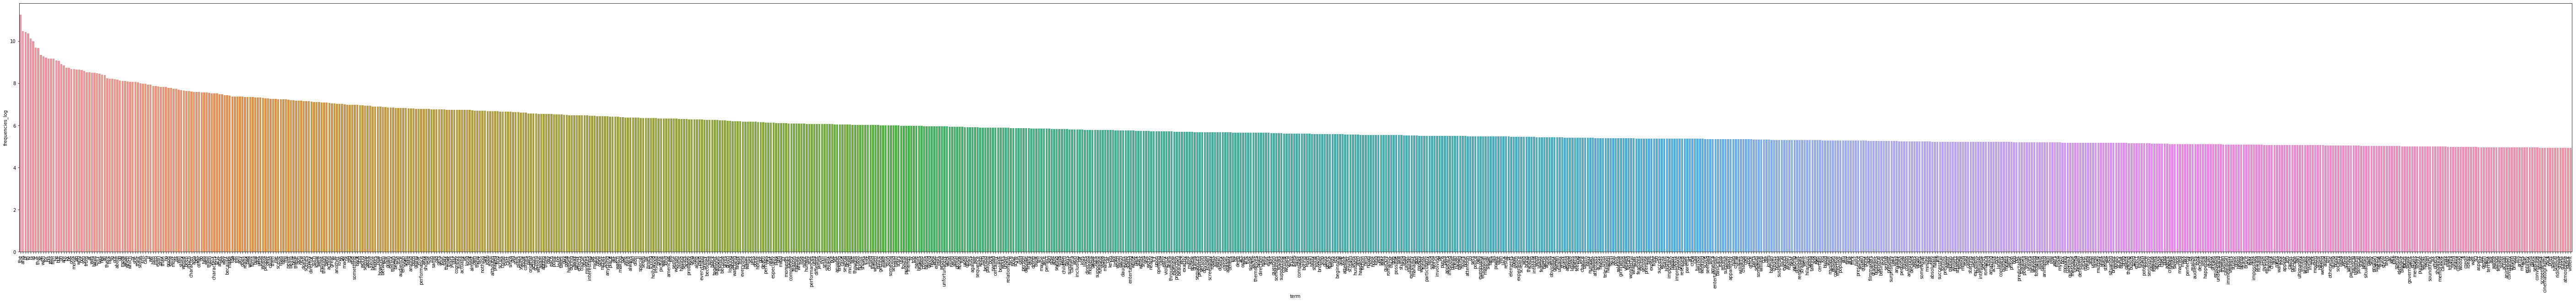

In [78]:
#apploy log to the count to make it  "linear"
import math
df['frequencies_log'] = df['count'].apply(math.log)
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=df['term'],
                y=df['frequencies_log'])
g.set_xticklabels(df['term'], rotation = 90);

### Discretization and Binarization

In [80]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
mlb.classes_

array(['negative', 'positive'], dtype='<U8')

In [81]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [83]:
X[0:9]

comment  type  category  \
0  plot : two teen couples go to a church party ,...     0  negative   
1  the happy bastard's quick movie review \ndamn ...     0  negative   
2  it is movies like these that make a jaded movi...     0  negative   
3   " quest for camelot " is warner bros . ' firs...     0  negative   
4  synopsis : a mentally unstable man undergoing ...     0  negative   
5  capsule : in 2176 on the planet mars police ta...     0  negative   
6  so ask yourself what " 8mm " ( " eight millime...     0  negative   
7  that's exactly how long the movie felt to me ....     0  negative   
8  call it a road trip for the walking wounded . ...     0  negative   

                                            unigrams bin_category  
0  [plot, :, two, teen, couples, go, to, a, churc...          [0]  
1  [the, happy, bastard, 's, quick, movie, review...          [0]  
2  [it, is, movies, like, these, that, make, a, j...          [0]  
3  [``, quest, for, camelot, ``, is, warner, bros...          [0]  
4  [synopsis, :, a, mentally, unstable, man, unde...          [0]  
5  [capsule, :, in, 2176, on, the, planet, mars, ...          [0]  
6  [so, ask, yourself, what, ``, 8mm, ``, (, ``, ...          [0]  
7  [that, 's, exactly, how, long, the, movie, fel...          [0]  
8  [call, it, a, road, trip, for, the, walking, w...          [0]

### Data Exploration

In [95]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [96]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['my giant is two movies for the price of one , but neither is worth the cost of admission , even if you get in free . \nas lamely directed by michael lehmann , the picture tries to be a comedy by using and reusing every giant joke in the book . \n ( " without goliath , david is just some punk throwing rocks . " ) \nlanguidly paced throughout , the movie becomes increasingly lugubrious as the screenplay by david seltzer ( the omen ) meanders toward its sad ending . \nsince it\'s rarely funny or convincingly dramatic , what the filmmakers thought they were doing remains a mystery . \nother than a few nice visuals , there\'s nothing to recommend the picture . \nwith great film comedies under his belt from when harry met sally ? to the original city slickers , billy crystal has shown that he\'s more than the world\'s best oscar host . \nhe does , however , have a propensity for choosing hopeless material as in last year\'s father\'s day and this year\'s my giant . \none wonders if he read

In [101]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)


# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 1 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [102]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.790209
Cosine Similarity using count bw 1 and 3: 0.662877
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# part 3 tf-idf vectorizer and NB-classifier

before we get start, I remove punctuation and numeric data from our comments as another level of data cleaning, since they have little to do with classification

In [108]:
X.iloc[0].comment

'plot two teen couples go church party drink drive get accident one guys dies girlfriend continues see life nightmares whats deal watch movie sorta find critique mindfuck movie teen generation touches cool idea presents bad package makes review even harder one write since generally applaud films attempt break mold mess head lost highway memento good bad ways making types films folks didnt snag one correctly seem taken pretty neat concept executed terribly problems movie well main problem simply jumbled starts normal downshifts fantasy world audience member idea whats going dreams characters coming back dead others look like dead strange apparitions disappearances looooot chase scenes tons weird things happen simply explained personally dont mind trying unravel film every give clue get kind fed films biggest problem obviously got big secret hide seems want hide completely final five minutes make things entertaining thrilling even engaging meantime really sad part arrow dig flicks like a

In [109]:
import string

def clean(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\n', '', text)
    return text

X.comment = X.comment.apply(clean)
X.iloc[0].comment

'plot two teen couples go church party drink drive get accident one guys dies girlfriend continues see life nightmares whats deal watch movie sorta find critique mindfuck movie teen generation touches cool idea presents bad package makes review even harder one write since generally applaud films attempt break mold mess head lost highway memento good bad ways making types films folks didnt snag one correctly seem taken pretty neat concept executed terribly problems movie well main problem simply jumbled starts normal downshifts fantasy world audience member idea whats going dreams characters coming back dead others look like dead strange apparitions disappearances looooot chase scenes tons weird things happen simply explained personally dont mind trying unravel film every give clue get kind fed films biggest problem obviously got big secret hide seems want hide completely final five minutes make things entertaining thrilling even engaging meantime really sad part arrow dig flicks like a

In [104]:
from nltk.corpus import stopwords

cachedStopWords = stopwords.words("english")

def remove_stopword(text):
     return " ".join([word for word in text.split() if word not in cachedStopWords])


X.comment = X.comment.apply(remove_stopword)
X.iloc[0].comment

'plot two teen couples go church party drink drive get accident one guys dies girlfriend continues see life nightmares whats deal watch movie sorta find critique mindfuck movie teen generation touches cool idea presents bad package makes review even harder one write since generally applaud films attempt break mold mess head lost highway memento good bad ways making types films folks didnt snag one correctly seem taken pretty neat concept executed terribly problems movie well main problem simply jumbled starts normal downshifts fantasy world audience member idea whats going dreams characters coming back dead others look like dead strange apparitions disappearances looooot chase scenes tons weird things happen simply explained personally dont mind trying unravel film every give clue get kind fed films biggest problem obviously got big secret hide seems want hide completely final five minutes make things entertaining thrilling even engaging meantime really sad part arrow dig flicks like a

### first I try count vectorizer for training classifier 

In [126]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer()
df_x = X["comment"]
df_y = X["type"]

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

x_traincv = vectorizer.fit_transform(x_train)
x_testcv = vectorizer.transform(x_test)

In [127]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_traincv,y_train)
predictions = mnb.predict(x_testcv)
accurate = np.array(y_test)
count = 0
for i in range (len(predictions)):
    if predictions[i] == accurate[i]:
        count=count+1
        
print(count/len(accurate))

0.8175


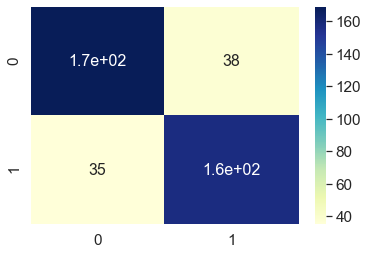

In [128]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
C = confusion_matrix(predictions, y_test)
sn.set(font_scale=1.4)#for label size
sn.heatmap(C, annot=True, annot_kws={"size": 16}, cmap="YlGnBu")
plt.show()

### here I contruct a word clould to show the inspiration of using tf-ifd vectorizer

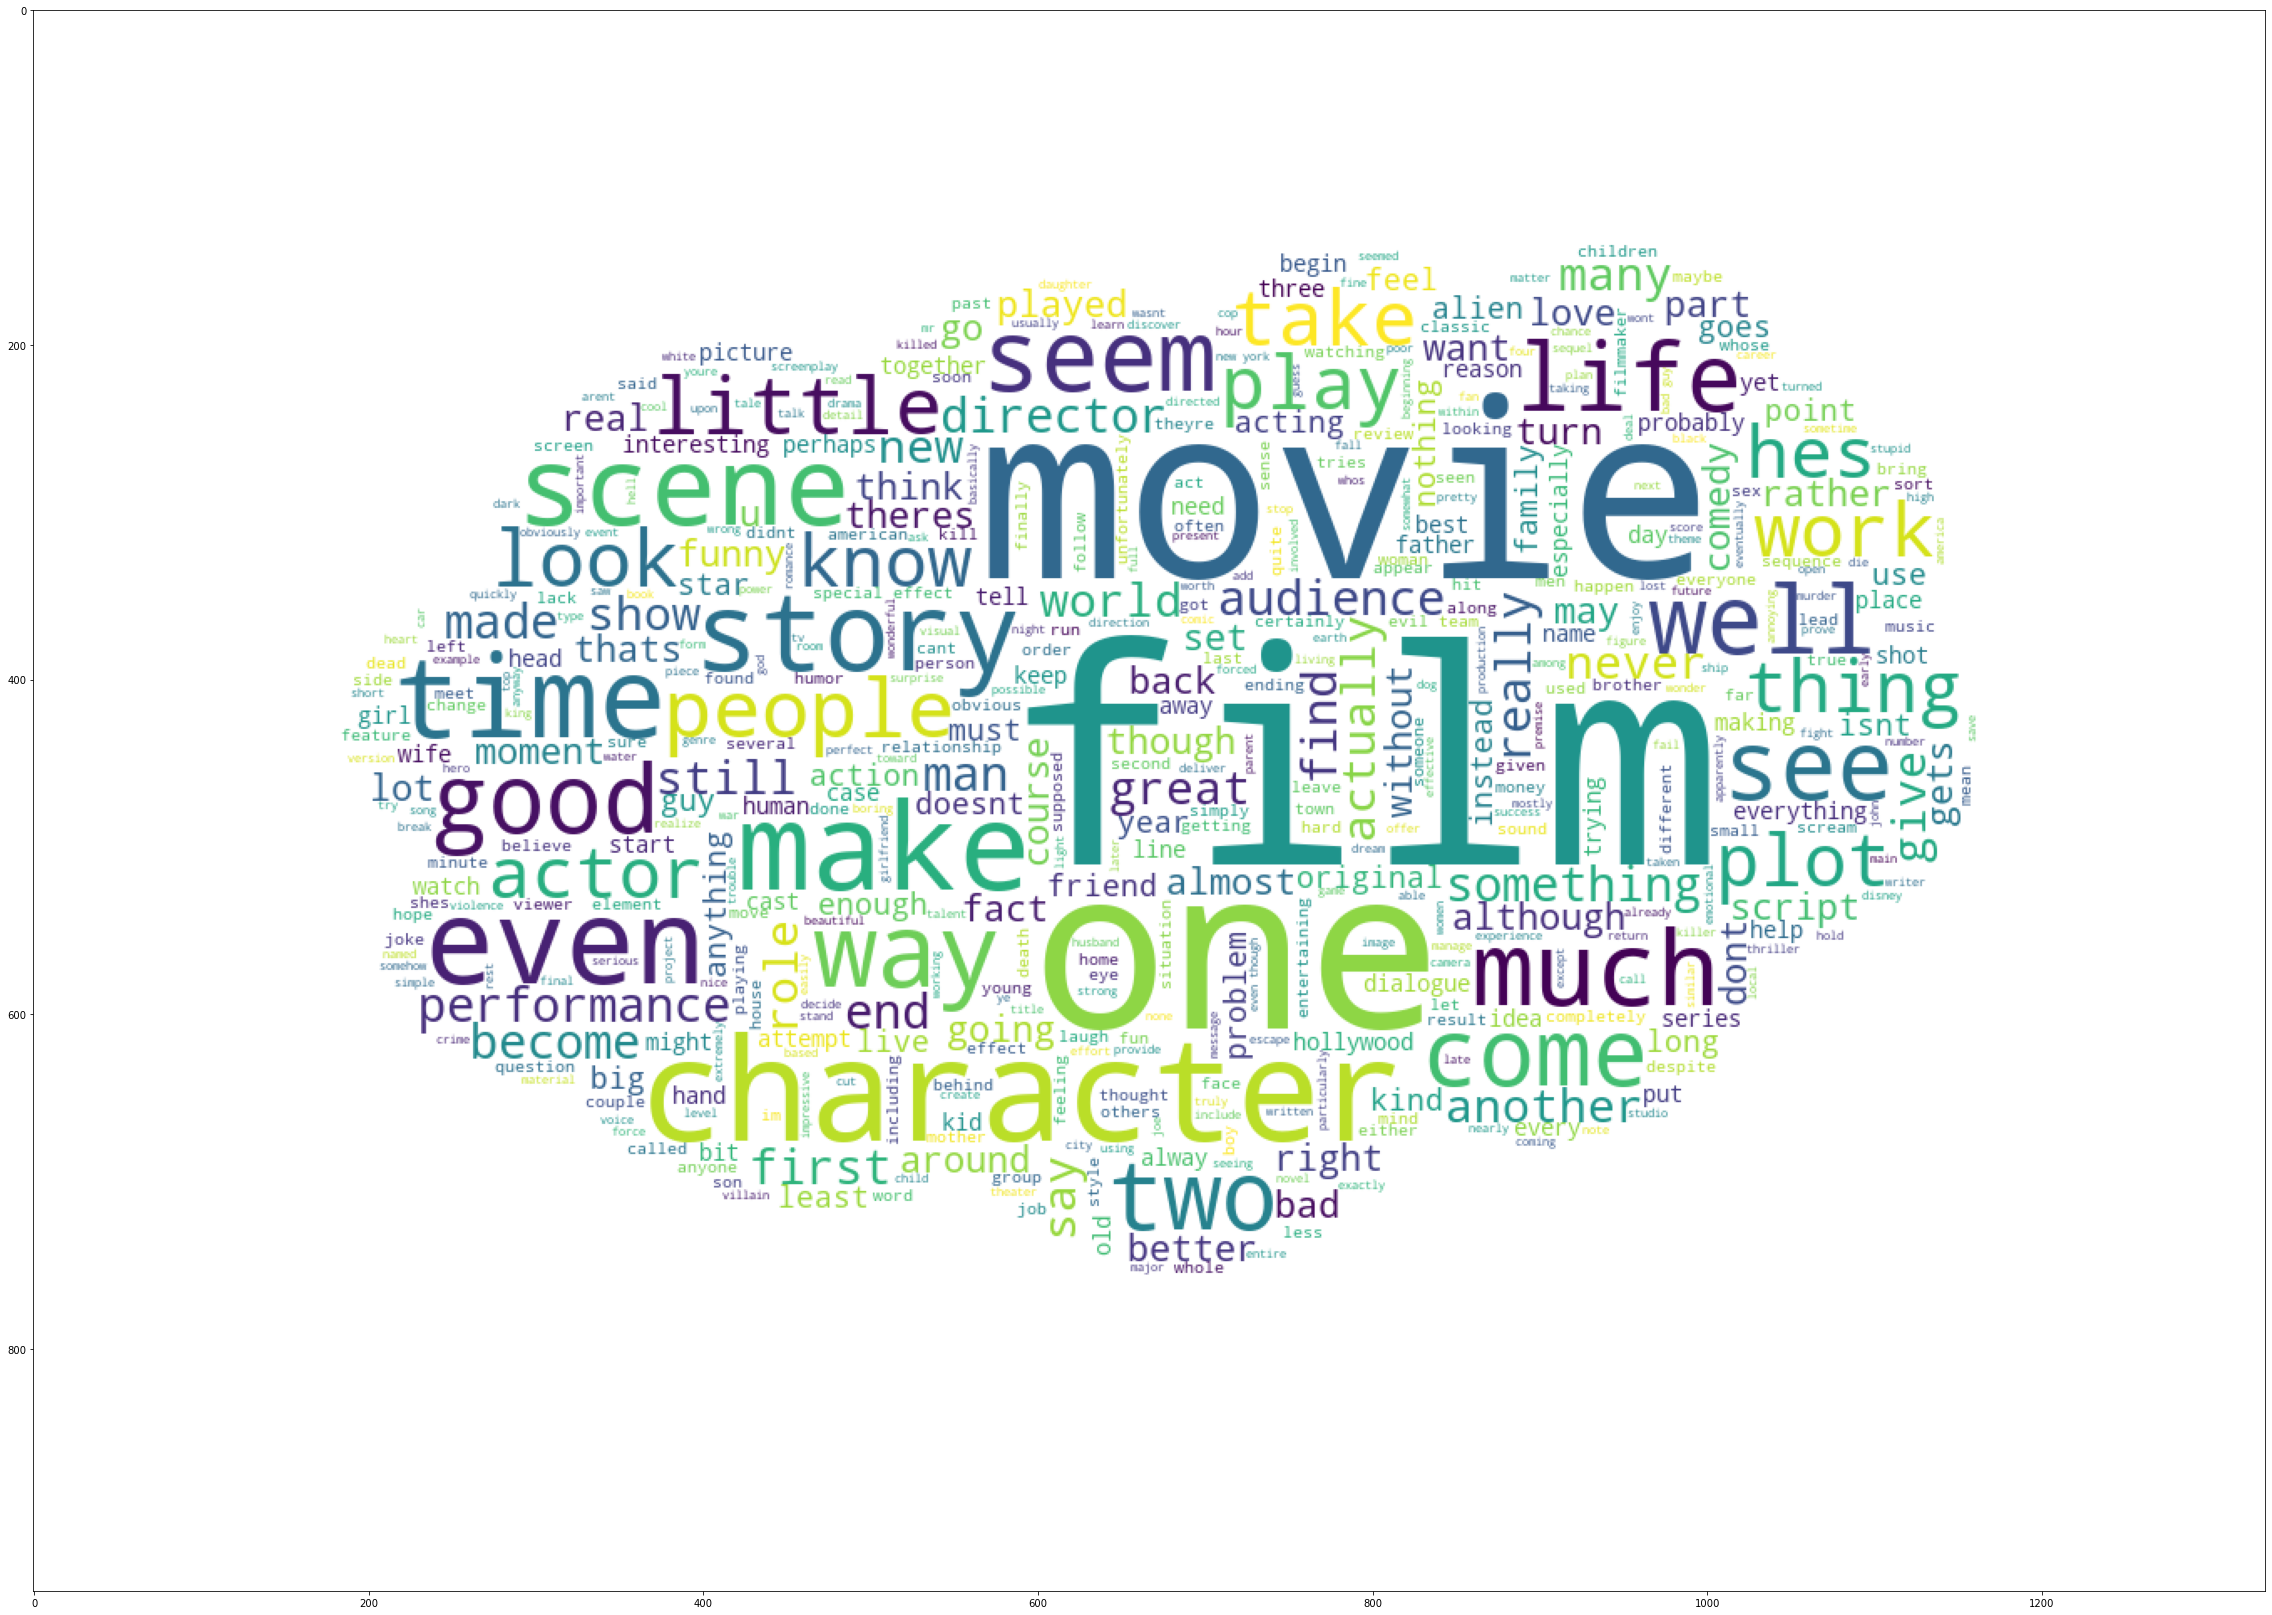

In [113]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = ''
for cmd in X['comment']:
    text += cmd
mask = np.array(Image.open("cloud.png"))
wc = WordCloud(background_color="white",
                    max_words=500, 
                    mask=mask,)
wc.generate(text)
plt.figure(figsize=(40, 30))
plt.imshow(wc)

By observing the word cloud, it's not hard to find we have tons of word appear so frequently in our data set like 'movie' 'film' ... but these frequent words are not very helpful in classifing our data.
Thats why we need a tf-idf vectorizer to lower the weight of word that appears so frequent

In [114]:
#split training and testing data set and use tf-idf vectorizer to get term frequency matirx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(stop_words = "english")
df_x = X["comment"]
df_y = X["type"]

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

x_traincv = vectorizer.fit_transform(x_train)
x_testcv = vectorizer.transform(x_test)

In [115]:
x_traincv.shape

(1600, 42017)

In [120]:
x_traincv[0:5, 0:100].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [121]:
vectorizer.get_feature_names()[0:50]

['aa',
 'aaa',
 'aaaaaaaaah',
 'aaaahhhs',
 'aahs',
 'aaliyah',
 'aaliyahs',
 'aalyah',
 'aalyahs',
 'aameetings',
 'aamir',
 'aardman',
 'aaron',
 'aatish',
 'aback',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abandons',
 'abating',
 'abba',
 'abbe',
 'abberline',
 'abbots',
 'abbott',
 'abbotts',
 'abbreviated',
 'abby',
 'abbys',
 'abc',
 'abcs',
 'abdomen',
 'abducted',
 'abduction',
 'abductions',
 'abduljabbar',
 'abe',
 'abel',
 'aberdeen',
 'abetted',
 'abetting',
 'abeyance',
 'abhorrence',
 'abhorrent',
 'abider',
 'abides',
 'abigail',
 'abigails',
 'abiility']

### Fitting model and prediction

Before fitting a classification model, lets take a look at the weight of each term produce by our tf-idf vectorizer

In [122]:
term_weight = np.asarray(x_traincv.mean(axis=0)).ravel().tolist()
term_array = pd.DataFrame({'term': vectorizer.get_feature_names(), 'weight': term_weight})
term_array.sort_values(by='weight', ascending=False, inplace=True)
term_array

term    weight
13323               film  0.046476
24090              movie  0.034570
21262               like  0.021500
15321               good  0.016996
35717              story  0.016132
...                  ...       ...
12027          esmeralda  0.000011
27405           petition  0.000011
23300              mikel  0.000009
20397              koven  0.000009
31382  robinsonblackmore  0.000009

[42017 rows x 2 columns]

fit the MNB model and use it to predict the category of testing set then we can caculate model accuracy

In [123]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_traincv,y_train)
predictions = mnb.predict(x_testcv)
accurate = np.array(y_test)
count = 0
for i in range (len(predictions)):
    if predictions[i] == accurate[i]:
        count=count+1
        
print(count/len(accurate))

0.8225


show the confusion matrix

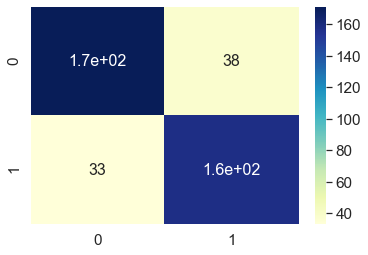

In [125]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
C = confusion_matrix(predictions, y_test)
sn.set(font_scale=1.4)#for label size
sn.heatmap(C, annot=True, annot_kws={"size": 16}, cmap="YlGnBu")
plt.show()

## the accuracy is beyond my expectation!